[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo/your-notebook.ipynb)

In [1]:
!pip install numpy matplotlib

# モンテカルロ法

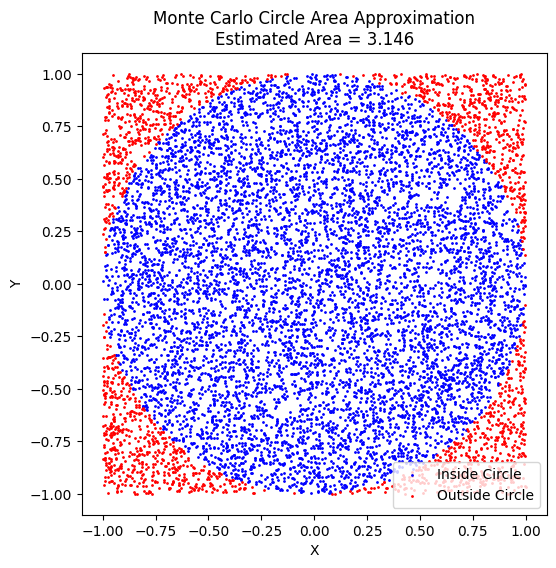

Estimated Area of the Circle: 3.146


In [2]:
import random
import matplotlib.pyplot as plt

def monte_carlo_circle_area(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    for _ in range(num_samples):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    # 円の面積の近似値
    area_estimate = (inside_circle / num_samples) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"Monte Carlo Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_monte_carlo_circle_area():
    num_samples = 10000
    area_estimate = monte_carlo_circle_area(num_samples)
    print(f"Estimated Area of the Circle: {area_estimate}")

test_monte_carlo_circle_area()

# 棄却サンプリング

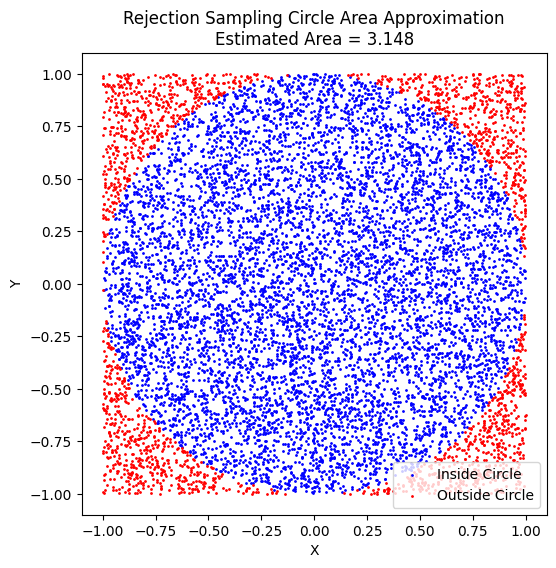

Estimated Area of the Circle: 3.148


In [12]:
import random
import matplotlib.pyplot as plt

def rejection_sampling_circle_area(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    for _ in range(num_samples):
        # 提案分布からサンプルを生成
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # サンプルが円の内部にあるかどうかを判定
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    # 円の面積の近似値
    area_estimate = (inside_circle / num_samples) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"Rejection Sampling Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_rejection_sampling_circle_area():
    num_samples = 10000
    area_estimate = rejection_sampling_circle_area(num_samples)
    print(f"Estimated Area of the Circle: {area_estimate}")

test_rejection_sampling_circle_area()

# 適応的棄却サンプリング

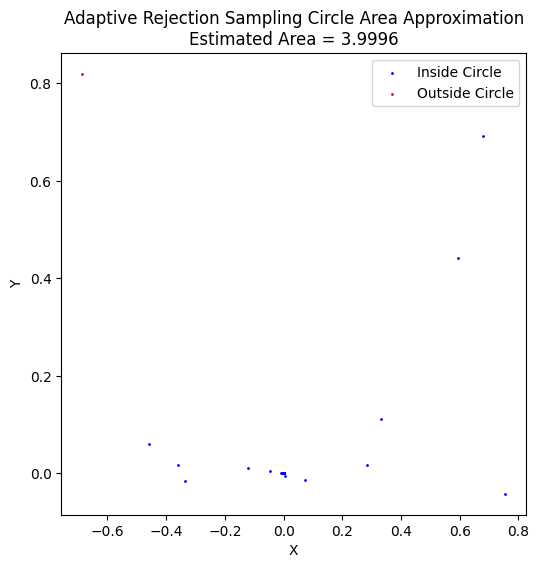

Estimated Area of the Circle: 3.9996


In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np

def adaptive_rejection_sampling_circle_area(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    # 初期提案分布の範囲
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1

    for _ in range(num_samples):
        # 提案分布からサンプルを生成
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)

        # サンプルが円の内部にあるかどうかを判定
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

        # 提案分布の範囲を適応的に調整
        if x < 0:
            x_min = max(x_min, x)
        else:
            x_max = min(x_max, x)
        if y < 0:
            y_min = max(y_min, y)
        else:
            y_max = min(y_max, y)

    # 円の面積の近似値
    area_estimate = (inside_circle / num_samples) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"Adaptive Rejection Sampling Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_adaptive_rejection_sampling_circle_area():
    num_samples = 10000
    area_estimate = adaptive_rejection_sampling_circle_area(num_samples)
    print(f"Estimated Area of the Circle: {area_estimate}")

test_adaptive_rejection_sampling_circle_area()

# 重点サンプリング

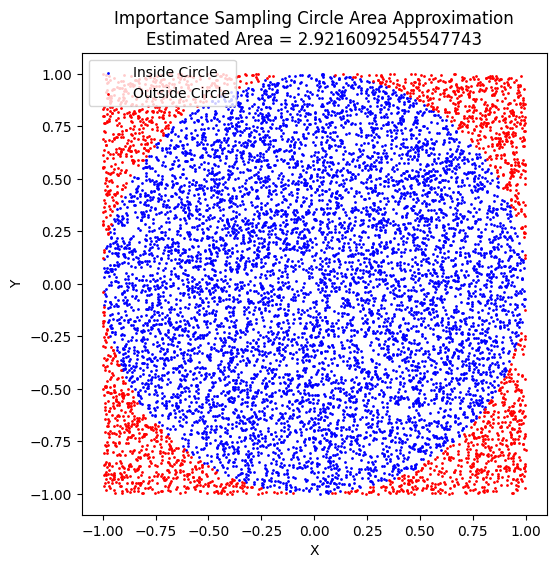

Estimated Area of the Circle: 2.9216092545547743


In [16]:
import random
import matplotlib.pyplot as plt
import numpy as np

def importance_sampling_circle_area(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []
    weights = []

    for _ in range(num_samples):
        # 提案分布からサンプルを生成（ここでは一様分布を使用）
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # 重みを計算（目標分布は円の内部、提案分布は一様分布）
        weight = np.exp(-0.5 * (x**2 + y**2))
        weights.append(weight)

        # サンプルが円の内部にあるかどうかを判定
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    # 円の面積の近似値
    area_estimate = (np.sum(weights) / num_samples) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"Importance Sampling Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_importance_sampling_circle_area():
    num_samples = 10000
    area_estimate = importance_sampling_circle_area(num_samples)
    print(f"Estimated Area of the Circle: {area_estimate}")

test_importance_sampling_circle_area()

# MCMC(メトロポリス・ヘイスティングスアルゴリズム)

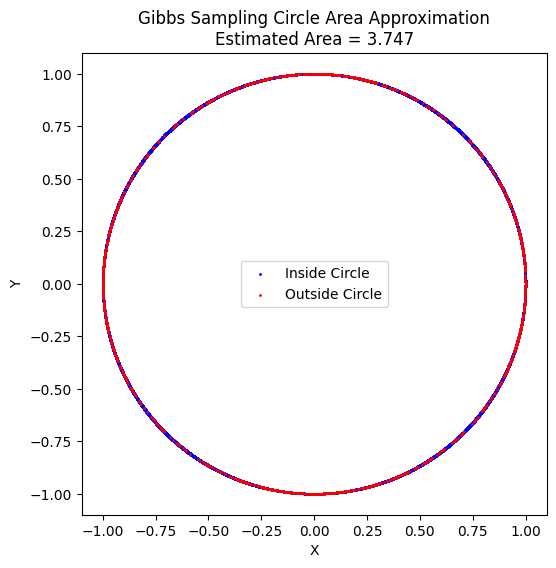

Estimated Area of the Circle: 3.747


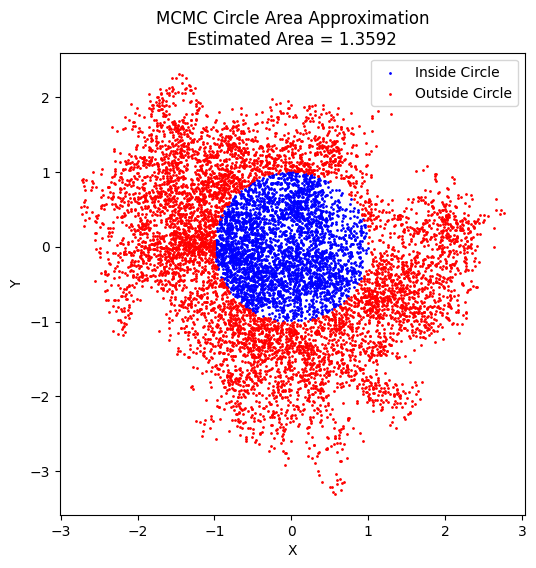

Estimated Area of the Circle: 1.3592


In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

def mcmc_circle_area(num_samples, proposal_width):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    # 初期値
    x_current = random.uniform(-1, 1)
    y_current = random.uniform(-1, 1)

    for _ in range(num_samples):
        # 提案分布から新しいサンプルを生成
        x_proposal = np.random.normal(x_current, proposal_width)
        y_proposal = np.random.normal(y_current, proposal_width)

        # 提案サンプルが円の内部にあるかどうかを判定
        if x_proposal**2 + y_proposal**2 <= 1:
            inside_circle += 1
            inside_x.append(x_proposal)
            inside_y.append(y_proposal)
        else:
            outside_x.append(x_proposal)
            outside_y.append(y_proposal)

        # 受け入れ比率を計算
        p_current = np.exp(-0.5 * (x_current**2 + y_current**2))
        p_proposal = np.exp(-0.5 * (x_proposal**2 + y_proposal**2))
        acceptance_ratio = p_proposal / p_current

        # サンプルを受け入れるかどうかを決定
        if np.random.rand() < acceptance_ratio:
            x_current = x_proposal
            y_current = y_proposal

    # 円の面積の近似値
    area_estimate = (inside_circle / num_samples) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"MCMC Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_mcmc_circle_area():
    num_samples = 10000
    proposal_width = 0.1
    area_estimate = mcmc_circle_area(num_samples, proposal_width)
    print(f"Estimated Area of the Circle: {area_estimate}")
import random
import matplotlib.pyplot as plt
import numpy as np

def gibbs_sampling_circle_area(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    # 初期値
    x_current = random.uniform(-1, 1)
    y_current = random.uniform(-1, 1)

    for _ in range(num_samples):
        # x を条件付き分布からサンプリング
        x_proposal = np.random.uniform(-1, 1)
        y_proposal = np.sqrt(1 - x_proposal**2) * (1 if random.random() < 0.5 else -1)

        if x_proposal**2 + y_proposal**2 <= 1:
            inside_circle += 1
            inside_x.append(x_proposal)
            inside_y.append(y_proposal)
        else:
            outside_x.append(x_proposal)
            outside_y.append(y_proposal)

        # y を条件付き分布からサンプリング
        y_current = np.random.uniform(-1, 1)
        x_current = np.sqrt(1 - y_current**2) * (1 if random.random() < 0.5 else -1)

        if x_current**2 + y_current**2 <= 1:
            inside_circle += 1
            inside_x.append(x_current)
            inside_y.append(y_current)
        else:
            outside_x.append(x_current)
            outside_y.append(y_current)

    # 円の面積の近似値
    area_estimate = (inside_circle / (2 * num_samples)) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"Gibbs Sampling Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_gibbs_sampling_circle_area():
    num_samples = 10000
    area_estimate = gibbs_sampling_circle_area(num_samples)
    print(f"Estimated Area of the Circle: {area_estimate}")

test_gibbs_sampling_circle_area()
test_mcmc_circle_area()

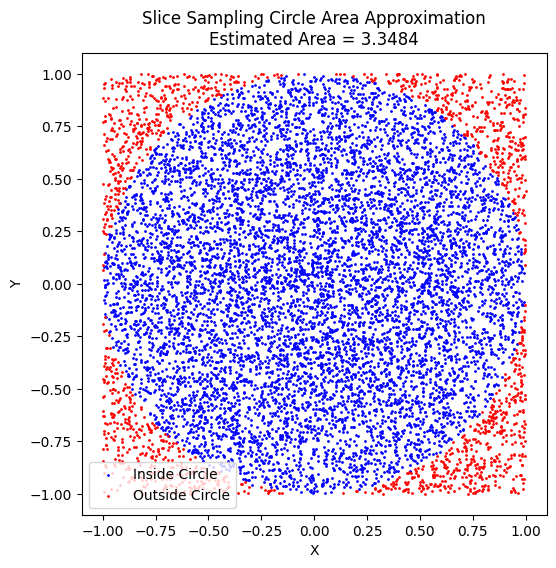

Estimated Area of the Circle: 3.3484


In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

def slice_sampling_circle_area(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    # 初期値
    x_current = random.uniform(-1, 1)
    y_current = random.uniform(-1, 1)

    for _ in range(num_samples):
        # スライスサンプリングのステップ
        # y のスライスを決定
        y_slice = random.uniform(0, np.exp(-0.5 * (x_current**2 + y_current**2)))

        # x の新しい値をサンプリング
        x_min, x_max = -1, 1
        while True:
            x_proposal = random.uniform(x_min, x_max)
            if np.exp(-0.5 * (x_proposal**2 + y_current**2)) >= y_slice:
                break
            if x_proposal < x_current:
                x_min = x_proposal
            else:
                x_max = x_proposal

        # y の新しい値をサンプリング
        y_min, y_max = -1, 1
        while True:
            y_proposal = random.uniform(y_min, y_max)
            if np.exp(-0.5 * (x_proposal**2 + y_proposal**2)) >= y_slice:
                break
            if y_proposal < y_current:
                y_min = y_proposal
            else:
                y_max = y_proposal

        # 新しいサンプルが円の内部にあるかどうかを判定
        if x_proposal**2 + y_proposal**2 <= 1:
            inside_circle += 1
            inside_x.append(x_proposal)
            inside_y.append(y_proposal)
        else:
            outside_x.append(x_proposal)
            outside_y.append(y_proposal)

        # 現在のサンプルを更新
        x_current = x_proposal
        y_current = y_proposal

    # 円の面積の近似値
    area_estimate = (inside_circle / num_samples) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"Slice Sampling Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_slice_sampling_circle_area():
    num_samples = 10000
    area_estimate = slice_sampling_circle_area(num_samples)
    print(f"Estimated Area of the Circle: {area_estimate}")

test_slice_sampling_circle_area()

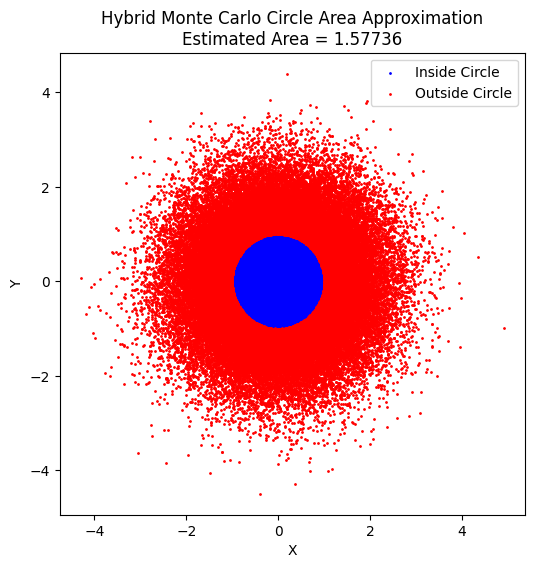

Estimated Area of the Circle: 1.57736


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hmc_circle_area(num_samples, epsilon, L):
    def potential_energy(x, y):
        return 0.5 * (x**2 + y**2)

    def kinetic_energy(px, py):
        return 0.5 * (px**2 + py**2)

    def hamiltonian(x, y, px, py):
        return potential_energy(x, y) + kinetic_energy(px, py)

    def leapfrog(x, y, px, py, epsilon, L):
        px -= 0.5 * epsilon * x
        py -= 0.5 * epsilon * y
        for _ in range(L - 1):
            x += epsilon * px
            y += epsilon * py
            px -= epsilon * x
            py -= epsilon * y
        x += epsilon * px
        y += epsilon * py
        px -= 0.5 * epsilon * x
        py -= 0.5 * epsilon * y
        return x, y, px, py

    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    # 初期値
    x_current = np.random.uniform(-1, 1)
    y_current = np.random.uniform(-1, 1)

    for _ in range(num_samples):
        # 運動量の初期化
        px_current = np.random.normal()
        py_current = np.random.normal()

        # ハミルトニアンの初期値
        H_current = hamiltonian(x_current, y_current, px_current, py_current)

        # リープフロッグ法による更新
        x_proposal, y_proposal, px_proposal, py_proposal = leapfrog(x_current, y_current, px_current, py_current, epsilon, L)

        # ハミルトニアンの提案値
        H_proposal = hamiltonian(x_proposal, y_proposal, px_proposal, py_proposal)

        # メトロポリス・ヘイスティングスの受け入れステップ
        if np.random.rand() < np.exp(H_current - H_proposal):
            x_current = x_proposal
            y_current = y_proposal

        # 新しいサンプルが円の内部にあるかどうかを判定
        if x_current**2 + y_current**2 <= 1:
            inside_circle += 1
            inside_x.append(x_current)
            inside_y.append(y_current)
        else:
            outside_x.append(x_current)
            outside_y.append(y_current)

    # 円の面積の近似値
    area_estimate = (inside_circle / num_samples) * 4

    # プロット
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
    plt.legend()
    plt.title(f"Hybrid Monte Carlo Circle Area Approximation\nEstimated Area = {area_estimate}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return area_estimate

# テストコード
def test_hmc_circle_area():
    num_samples = 10000
    epsilon = 0.1
    L = 10
    area_estimate = hmc_circle_area(num_samples, epsilon, L)
    print(f"Estimated Area of the Circle: {area_estimate}")

test_hmc_circle_area()